# Car Prices Prediction 
### 1.1 Giới thiệu
Một trong những thách thức của doanh số bán xe hơi là chính là __giá cả__ để đảm bảo rằng rất nhiều người mua xe và có nhu cầu lớn vì giá này. Các yếu tố ảnh hưởng đến giá của xe hơi là __mileage__, __car size__, __manufacturer__. Vì vậy khá khó khăn con người quyết giá, đặc biệt là khi có rất nhiều tính năng này ảnh hưởng đến giá cả. Một trong những giải pháp cho thách thức này là sử dụng __machine learning__ để hiểu những hiểu biết và đưa ra những dự đoán có giá trị tạo ra lợi nhuận cho các công ty.

### 1.2 Metrics 
1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. R2 Score


### 1.3 Source

Chúng ta sẽ làm việc với một dữ liệu khá lớn có chứa khoảng __10000__ các điểm dữ liệu

https://www.kaggle.com/CooperUnion/cardataset

Make - Nhà sản xuất

Model - Mẫu xe hơi

Year - năm được sản xuất

Engine Fuel Type - Loại nhiên liệu động cơ

Engine HP - Mã lực động cơ

Engine Cylinders - Số lượng xi lanh động cơ

Transmission Type - kiểu truyền tải

Driven_Wheels - Bánh xe

Number of Doors - Số cửa trong xe hơi

Market Category - thể loại xe phù hợp

Vehicle Size - Vehicle Style

highway MPG -  Tốc độ / gallon

city mpg - city speed

Popularity - dữ liệu  được trích xuất từ sự phổ biến của chiếc xe giữa những người dùng Twitter

MSRP - manufacturer suggested retail price - giá bán lẻ đề xuất từ nhà sản xuất 


### 1.4 Importing libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

## 1.5 Reading the data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(11914, 16)

In [4]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 2.1 Countplot 

## 2.1.1 Countplot của các công ty xe hơi khác nhau

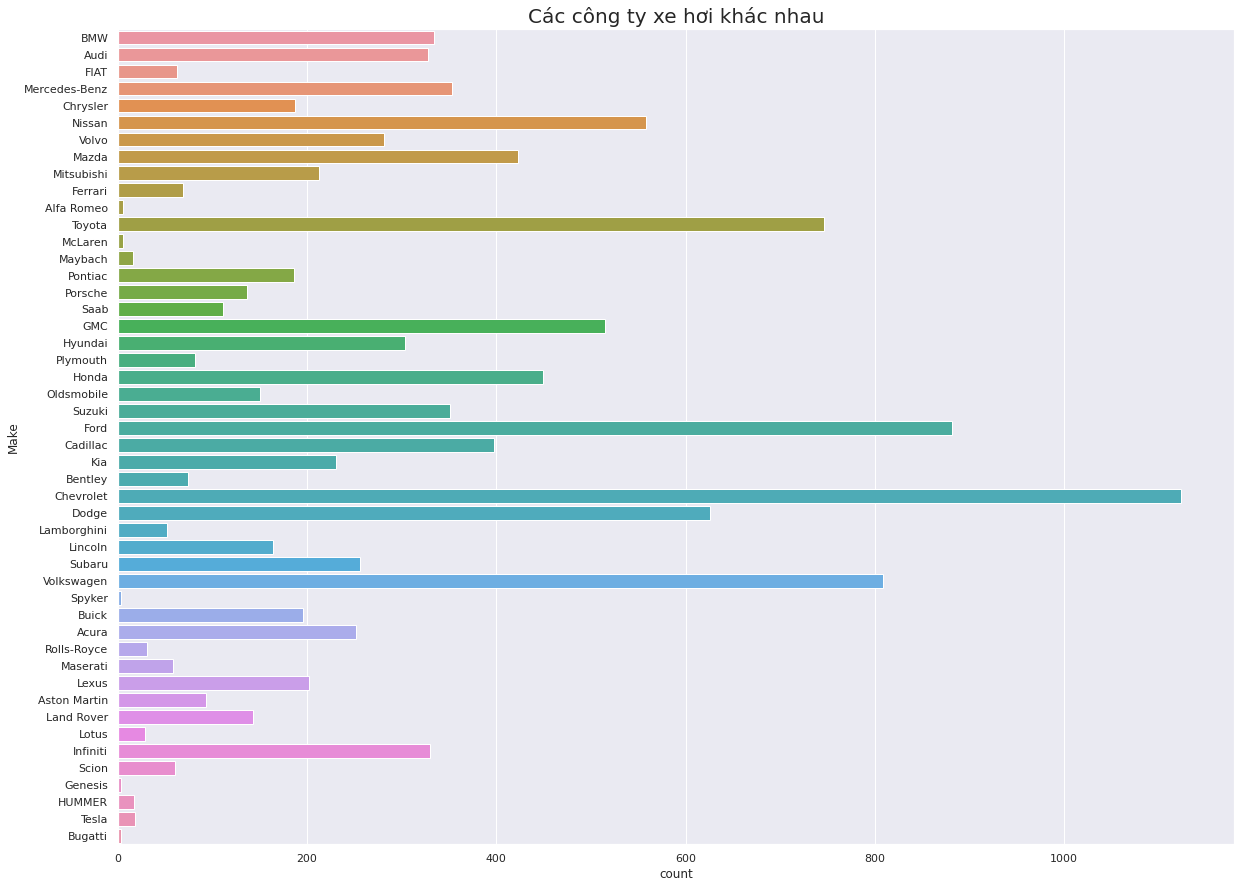

In [5]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Các công ty xe hơi khác nhau", fontsize = 20)
plt.show()

Có hơn 1000 xe cho công ty 'Chevrolet' trong bộ dữ liệ. Chỉ có một vài chiếc xe cho các công ty như 'Bugatti' và 'Genesis'

## 2.1.2 Countplot của tổng số xe mỗi năm

Có nhiều xe trong những năm 2015 đến 2017 so với những năm khác trong bộ dữ liệu. Từ điều này, chúng ta có thể hiểu rằng hầu hết dữ liệu của chúng ta đều chứa các giá trị gần đây. Đây là một bộ dữ liệu tốt vì chúng ta quan tâm đến giá của những chiếc xe trong tương lai.

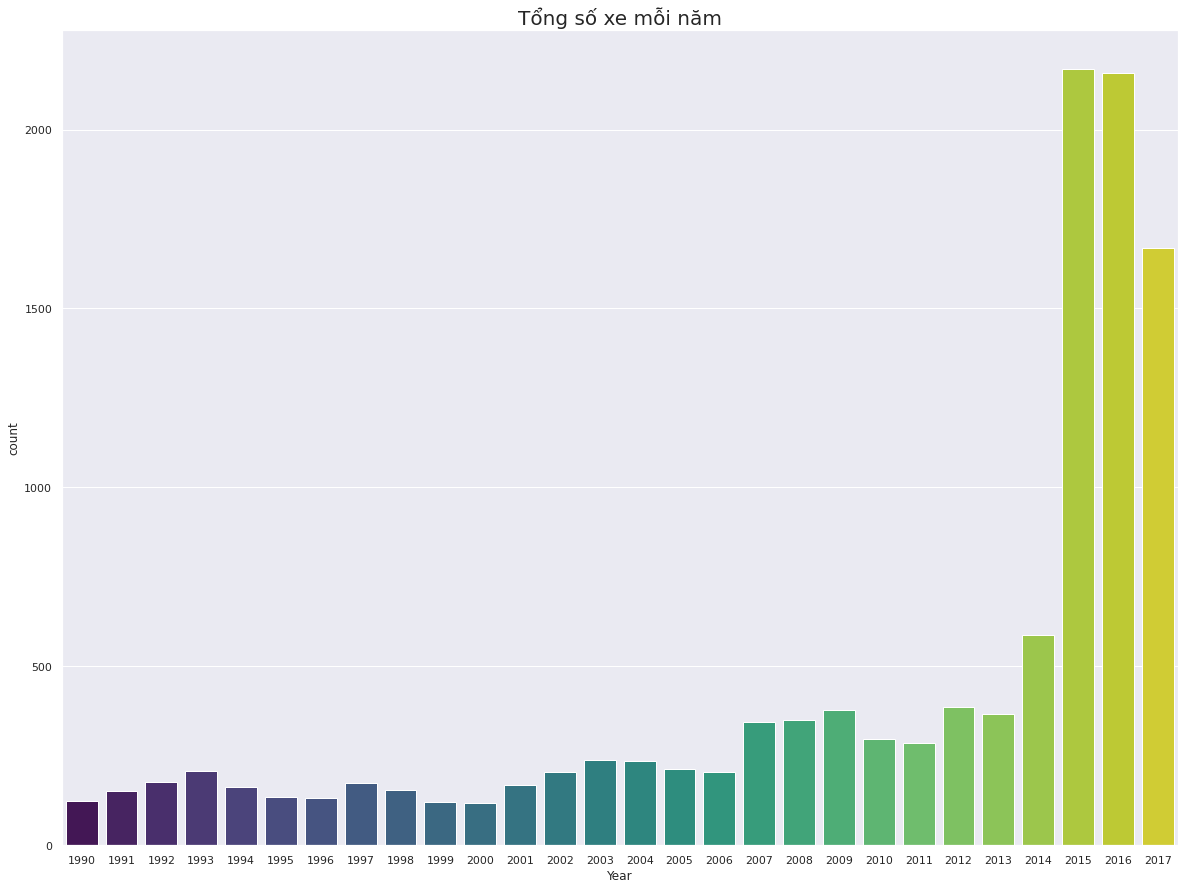

In [6]:
plt.figure(figsize = (20, 15))
sns.countplot(data.Year, palette = 'viridis')
plt.title("Tổng số xe mỗi năm", fontsize = 20)
plt.show()

## 2.1.3 Counting những chiếc xe dựa trên transmission type

Hầu hết những chiếc xe trong bộ dữ liệu là những chiếc xe tự động (automatic)

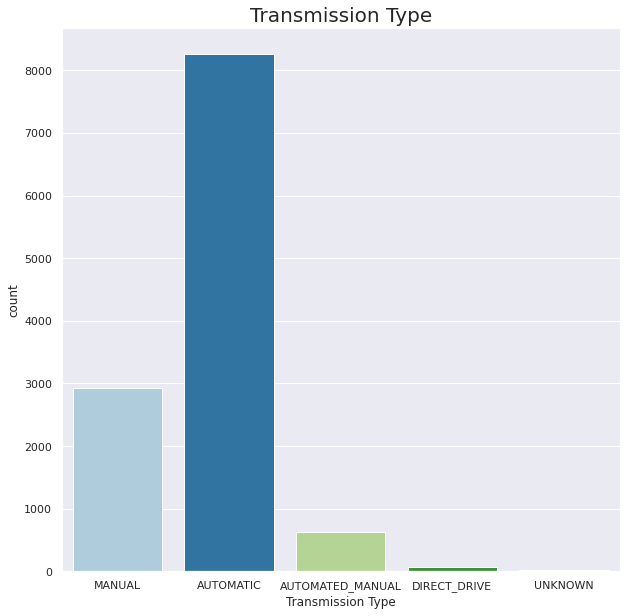

In [7]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

## 2.1.4 Countplot của loại nhiên liệu động cơ (Engine Fuel Type)

Phần lớn những chiếc xe sử dụng loại không chì thông thường (regular unleaded). Ngoài ra, có các loại khác như 'không chì cao cấp (bắt buộc) và không chì cao cấp (khuyến nghị) . Hơn nữa, có một vài chiếc xe điện trong dữ liệu.

<AxesSubplot:xlabel='count', ylabel='Engine Fuel Type'>

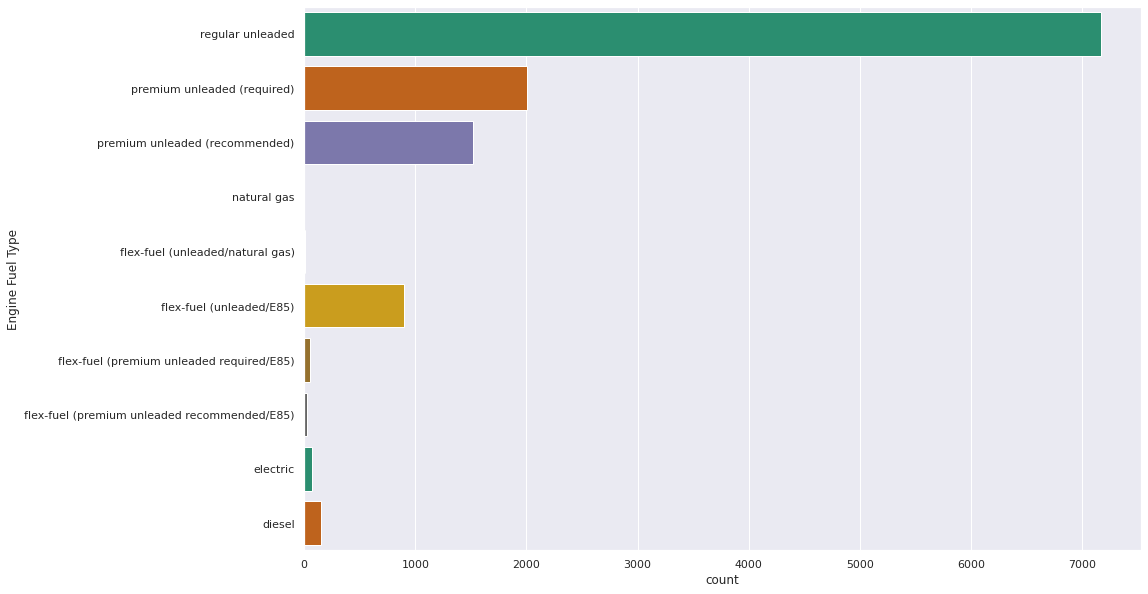

In [8]:
plt.figure(figsize = (15, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

## 2.1.5 Countplot của kích thước xe (Vehicle Size)

Hầu hết trong dữ liệu là những chiếc xe nhỏ gọn (compact), sau đó là xe hạng trung( Midsize). Chỉ có một vài chiếc xe lớn (large) so với những chiếc xe nhỏ gọn và hạng trung. Đây là điển hình của dữ liệu trong thế giới thực vì chúng ta không có nhiều xe hơi lớn.

<AxesSubplot:xlabel='Vehicle Size', ylabel='count'>

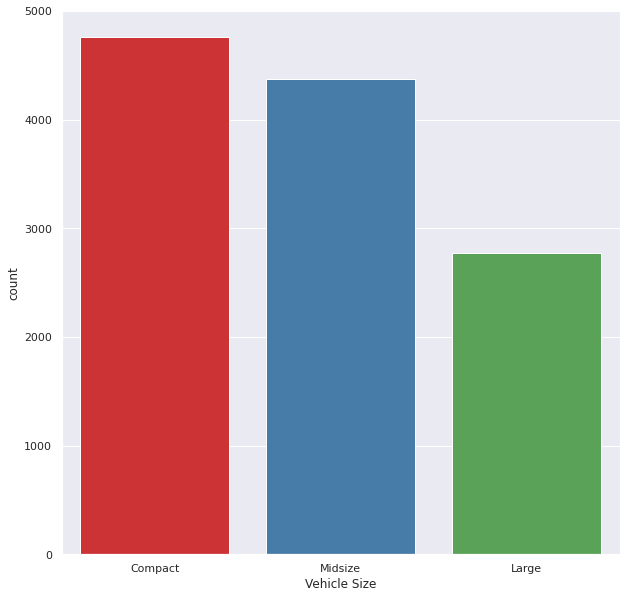

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

## 2.2 Missingno
Có nhiều giá trị bị thiếu trong feature 'Danh mục thị trường' (Market Category). Ngoài ra còn có một vài giá trị bị thiếu trong 'Động cơ HP' (Engine HP), 'Xi lanh động cơ' (Engine Cylinders) và 'số lượng cửa' (Number of Doors) 

<AxesSubplot:>

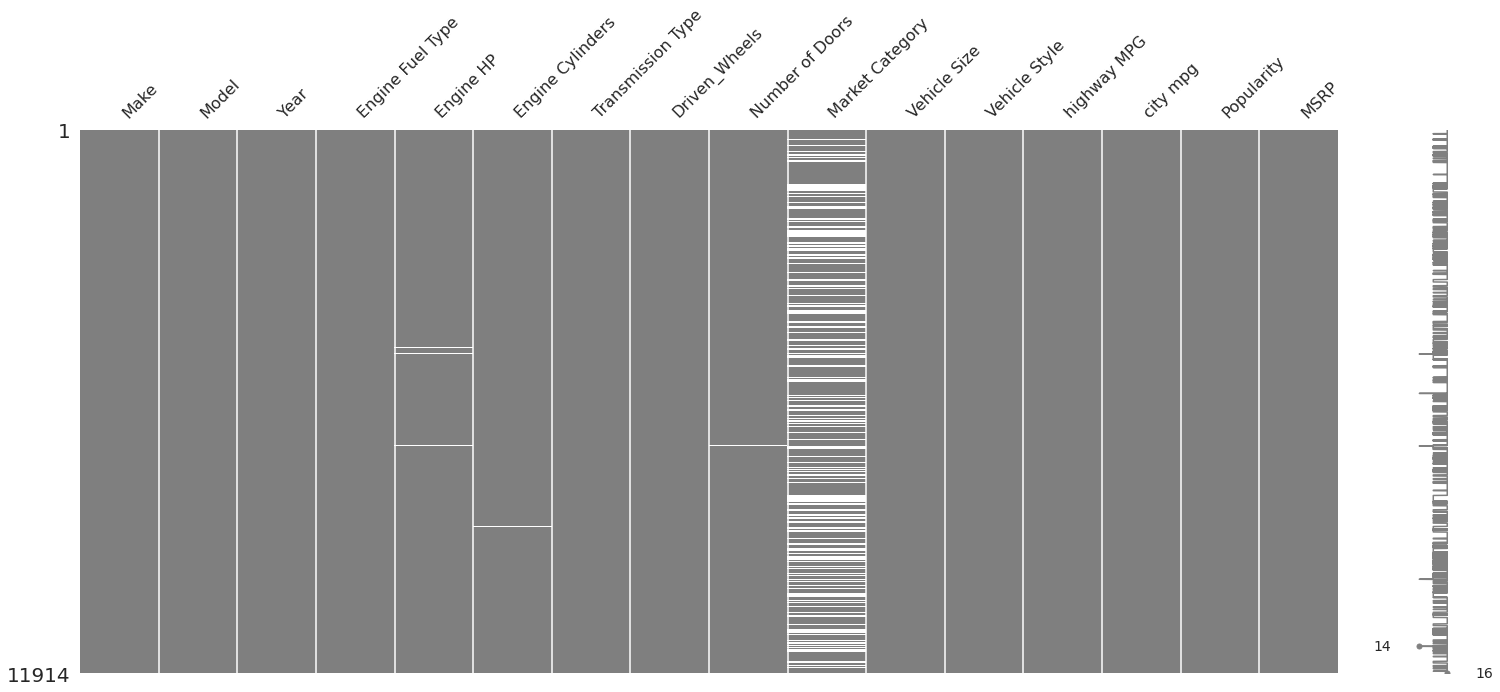

In [10]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

## 2.3.1 Grouping dữ liệu trên năm

Nhìn vào biểu đồ ở dưới , chúng ta thấy rằng giá xe ô tô trung bình cao nhất trong năm 2014 sau đó là năm 2012. Giá trung bình của xe hơi trong năm 2000 trở xuống là khá thấp như có thể dễ dàng nhìn thấy. Trung bình, chúng tôi cũng tìm thấy một xu hướng thú vị. Khi nhiều năm tăng lên, chúng ta có thể thấy rằng giá trung bình của xe hơi tiếp tục tăng nhưng không ổn định.

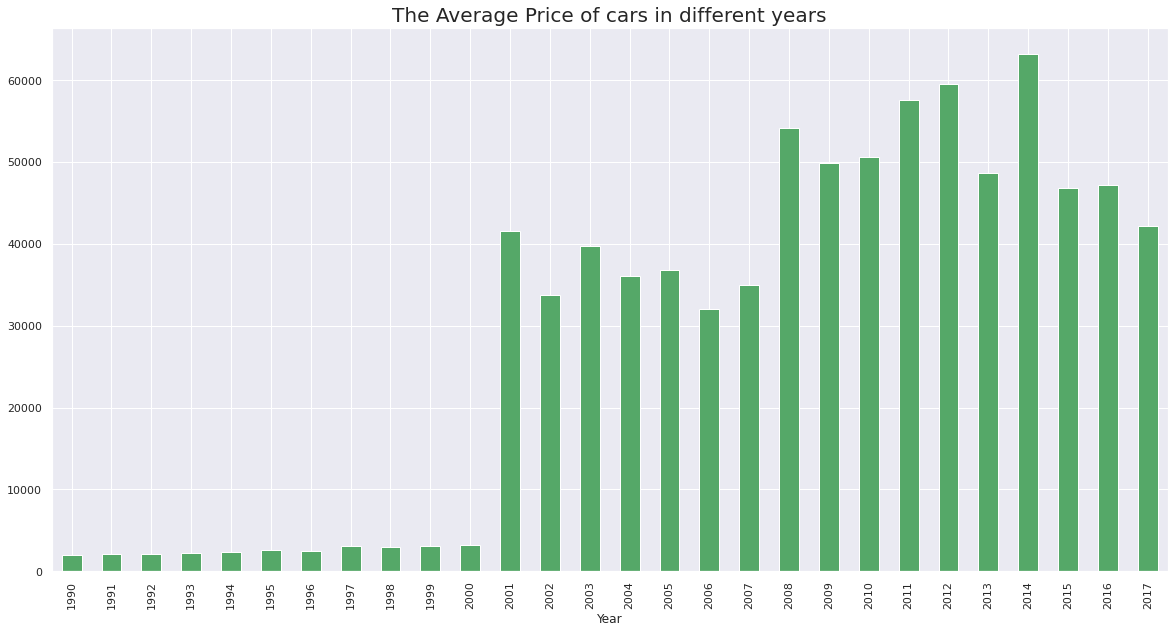

In [11]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()


## 2.3.2 Grouping dữ liệu Transmission Type

Chúng ta thấy rằng những chiếc xe tự động_số sàn (automated_manual) có giá trung bình cao nhất. Sau đó là những chiếc xe tự động.

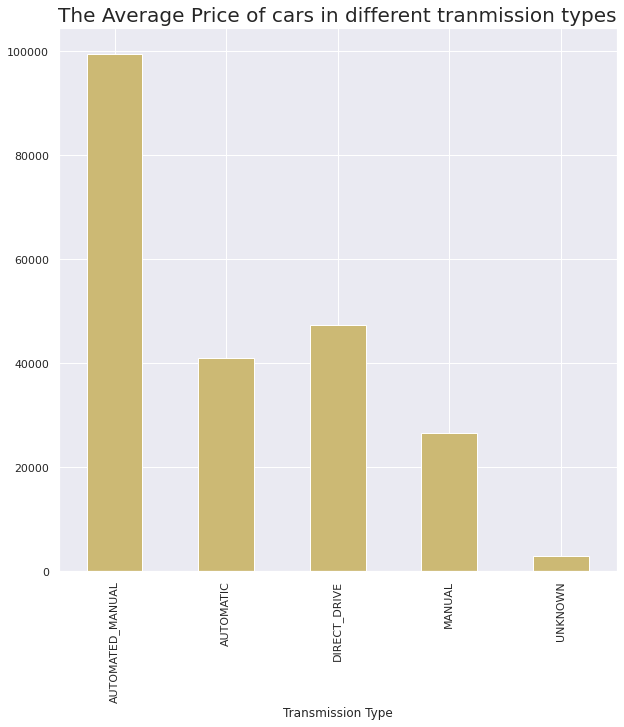

In [12]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()


## 2.3.3 Grouping Giá xe hơi của các công ty khác nhau
Chúng tôi thấy rằng giá trung bình của Bugatti Veyron là khoảng 1,75 triệu đô la, quá đắt so với những chiếc xe khác. Có những chiếc xe khác như Maybach và Rolce-Royce cũng đắt tiền nếu chúng ta loại bỏ Bugatti khỏi danh sách. Và chiếc xe rẻ nhất là Plymouth.

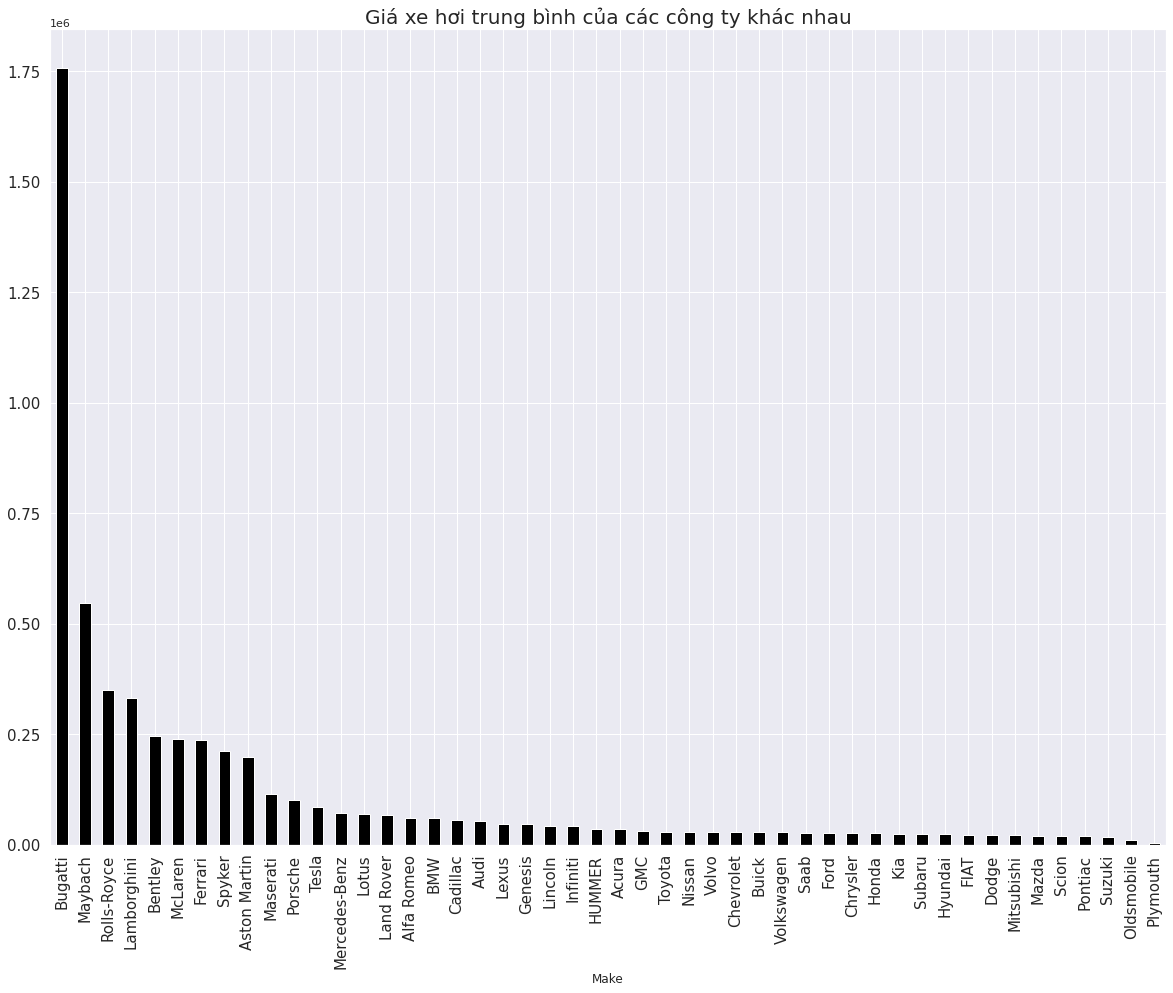

In [13]:
plt.figure(figsize = (20, 15))
data.groupby(['Make']).mean()['MSRP'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("Giá xe hơi trung bình của các công ty khác nhau", fontsize = 20)
plt.show()


## 2.3.4 Grouping Mã lực (Engine HP)của các công ty khác nhau
Trong biểu đồ ở dưới thì Chúng ta thấy rằng Bugatti có mã lực cao nhất (HP). Ngoài ra, có những nhà sản xuất xe hơi khác như McLaren và Maybach cũng có mã lực tốt (HP). Và có mã lực của 'Tesla' không được biết đến

<AxesSubplot:ylabel='Make'>

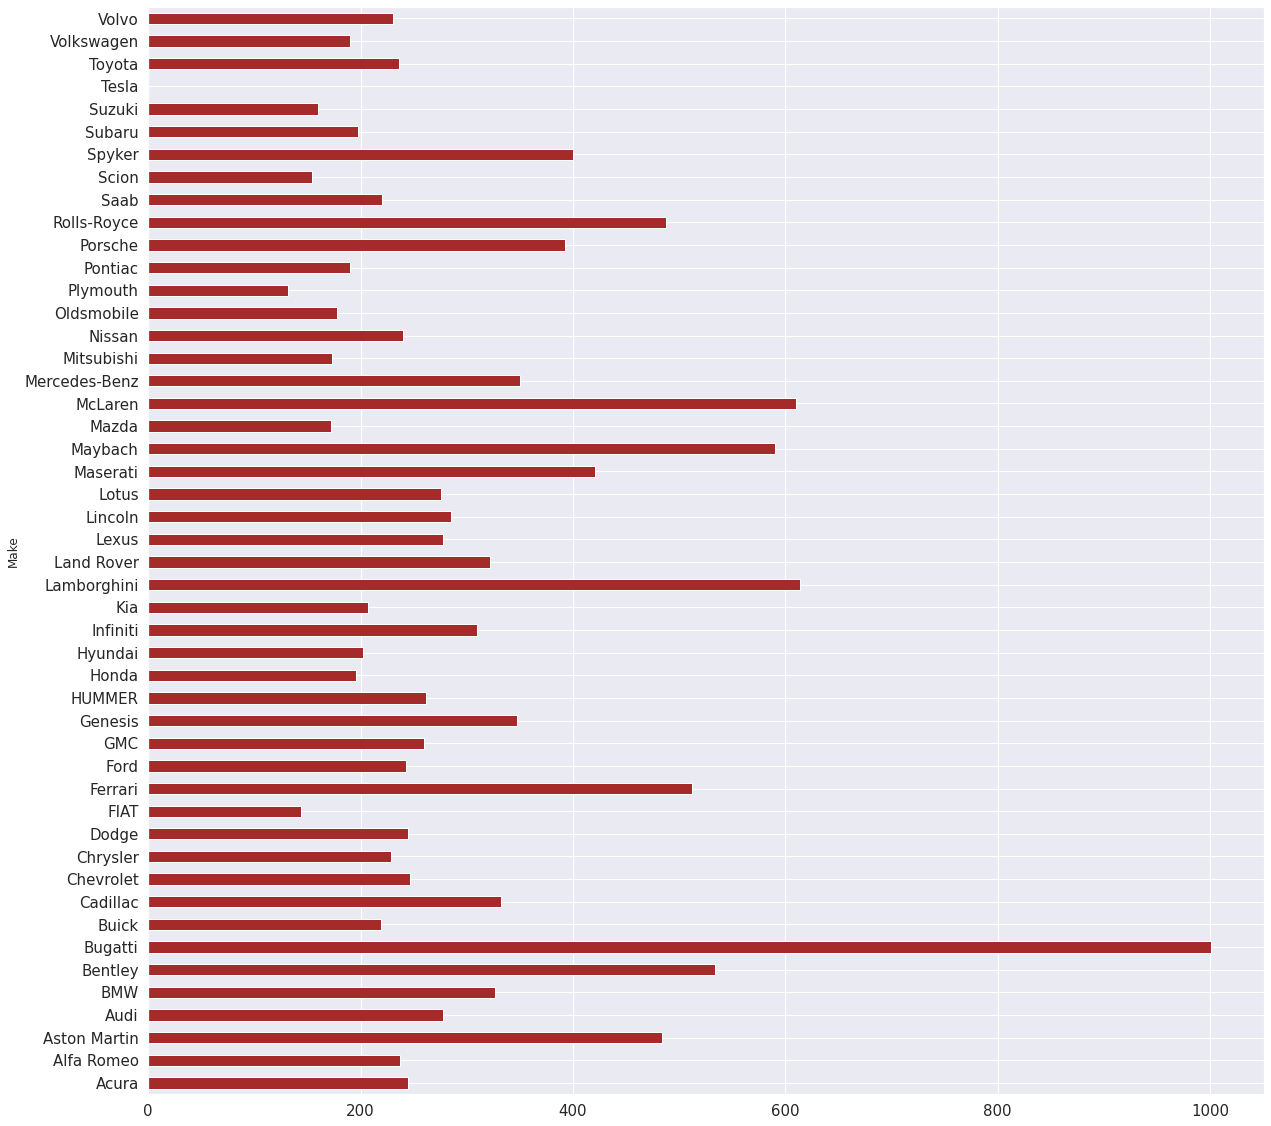

In [14]:
plt.figure(figsize = (20, 20))
data.groupby('Make').mean()['Engine HP'].plot(kind = 'barh', fontsize = 15, color = 'brown')

## 2.3.5 Grouping các thương hiệu dựa trên độ phổ biến (Popularity)

Dựa trên dữ liệu chúng ta thấy rằng 'Ford' phổ biến nhất, theo sau là 'BMW' và 'Audi'. Chúng ta thấy rằng có những nhà sản xuất xe hơi khác như 'Lincoln' và 'Genesis' không quá phổ biến.

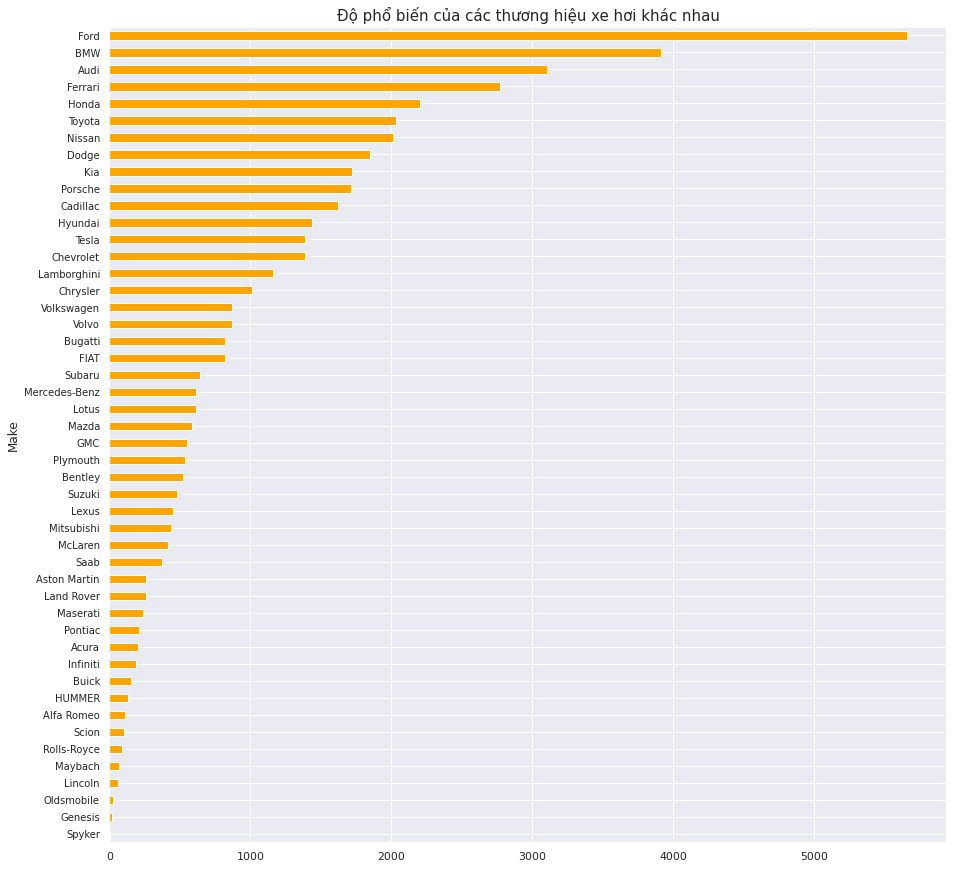

In [15]:
plt.figure(figsize = (15, 15))
data.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Độ phổ biến của các thương hiệu xe hơi khác nhau", fontsize = 15)
plt.show()

## 2.4 Scatterplot giữa 'highway MPG' và 'city mpg' 
MPG = miles per gallon.

Có vẻ là có mối quan hệ tuyến tính giữa 'highway MPG' và 'city MPG' vì chúng có mối tương quan với nhau rất nhiều. Trong biểu đồ dưới, chúng ta thấy rằng có một ngoại lệ trong đó highway MPG là khoảng 350. Chúng ta có thể loại bỏ ngoại lệ vì nó sẽ ảnh hưởng đến kết quả mô hình.

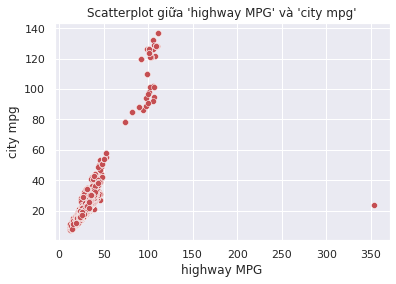

In [16]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot giữa 'highway MPG' và 'city mpg'")
plt.show()

removing the outlier.

In [17]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [18]:
data = data[data['highway MPG'] < 350]

Bây giờ chúng tôi sẽ sử dụng scatterplot như ở trên với việc loại bỏ các ngoại lệ. Chúng tôi thấy gần như một đường tuyến tính giữa hai features mà chúng ta đã xem xét.

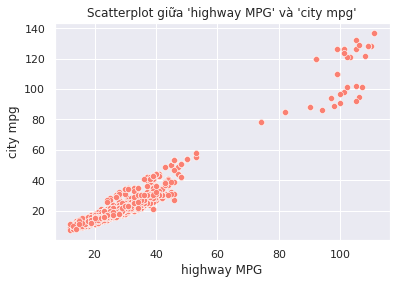

In [19]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot giữa 'highway MPG' và 'city mpg'")
plt.show()

## 2.5 Heatmap

Chúng tôi thấy rằng 'highway MPG' và 'City MPG' có mối tương quan cao và giá trị tương ứng là 0,94. Thêm vào đó, chúng ta thấy rằng 'Engine Horsepower' và 'Engine Cylinders' tương quan và giá trị là 0,78. Điều đó đúng khi số lượng xi lanh cao thì xe hơi sẽ có một mã lực cao.

[]

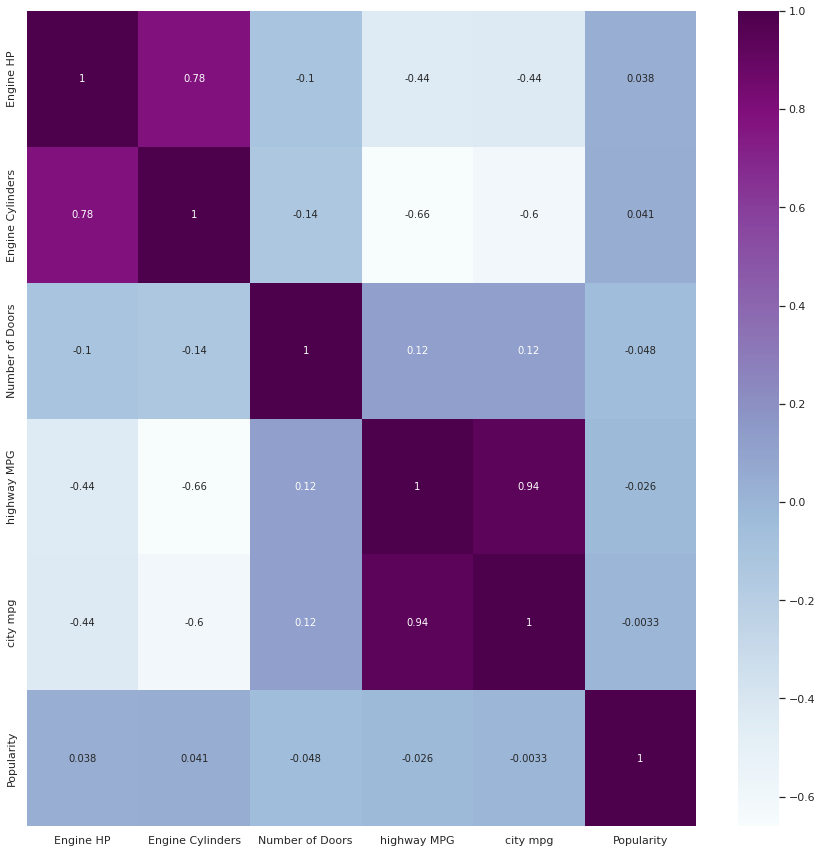

In [20]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()
sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)
plt.plot()

## Checking the NULL values

In [21]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [22]:
data.drop(['Market Category'], inplace = True, axis = 1)
data.dropna(inplace = True)

In [23]:
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

## Creating a new column
Bây giờ chúng ta sẽ thêm một feature mới được sử dụng để tính toán sự khác biệt giữa năm hiện tại và năm sản xuất xe để có thêm thông tin cho các mô hình

In [24]:
data['Present Year'] = 2021

In [25]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

In [26]:
data.drop(['Present Year'], inplace = True, axis = 1)

## 2.6 Biểu đồ theo 'năm sản xuất' (Years of Manufacture)

Chúng ta thấy rằng hầu hết các giá trị là khoảng 6 năm. Và có một số chiếc xe khác trong dữ liệu khoảng 31 năm, những chiếc xe này có số lượng rất ít. Nên làm việc với các điểm dữ liệu gần đây nhất vì tương lai cũng sẽ phụ thuộc nhiều hơn và sẽ theo xu hướng của các điểm dữ liệu gần đây nhất được xem xét.

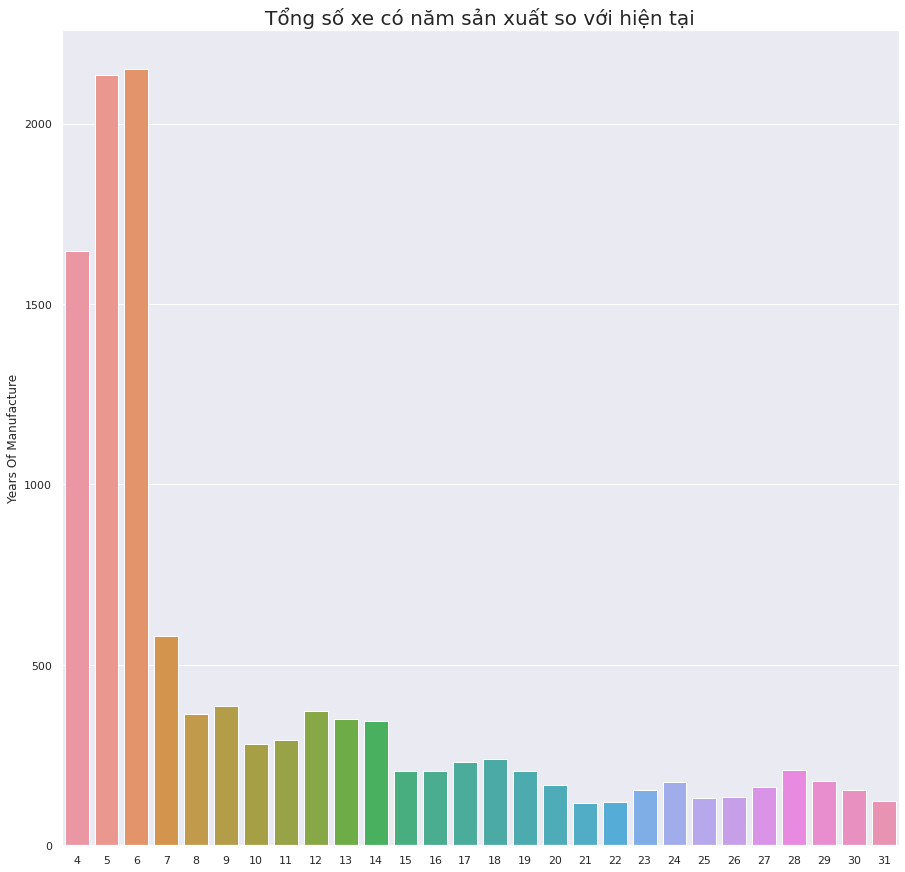

In [27]:
plt.figure(figsize = (15, 15))
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Tổng số xe có năm sản xuất so với hiện tại", fontsize = 20)
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11811 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11811 non-null  object 
 1   Model                 11811 non-null  object 
 2   Year                  11811 non-null  int64  
 3   Engine Fuel Type      11811 non-null  object 
 4   Engine HP             11811 non-null  float64
 5   Engine Cylinders      11811 non-null  float64
 6   Transmission Type     11811 non-null  object 
 7   Driven_Wheels         11811 non-null  object 
 8   Number of Doors       11811 non-null  float64
 9   Vehicle Size          11811 non-null  object 
 10  Vehicle Style         11811 non-null  object 
 11  highway MPG           11811 non-null  int64  
 12  city mpg              11811 non-null  int64  
 13  Popularity            11811 non-null  int64  
 14  MSRP                  11811 non-null  int64  
 15  Years Of Manufactur

In [29]:
from pycaret.regression import *


In [30]:
reg = setup(data = data, target = 'MSRP', session_id=123,
            normalize = True,
            remove_outliers = True, outliers_threshold = 0.05,
            remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
            ) 

,Description,Value
0,session_id,123
1,Target,MSRP
2,Original Data,"(11811, 16)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7853, 676)"


## 3.1 Linear Regression 

In [31]:
lr = create_model('lr',return_train_score=True)

In [32]:
pred_holdout = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,7618.4287,1414374174.6697,37608.1663,0.5423,0.4872,0.4176


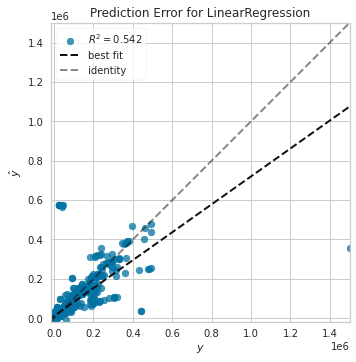

In [34]:
plot_model(lr,plot = 'error')

## 3.2 Decision Tree Regression 

In [35]:
dt = create_model('dt', return_train_score=True)

In [36]:
pred_holdout = predict_model(dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,4762.1479,574148836.2000,23961.4031,0.8142,0.1521,0.0908


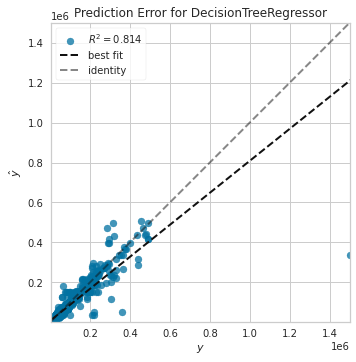

In [37]:
plot_model(dt,plot = 'error')

## 3.3 Random Forest Regression 

In [38]:
rf = create_model('rf', return_train_score=True)

In [39]:
pred_holdout = predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,4156.1366,503401058.8873,22436.6009,0.8371,0.1210,0.0794


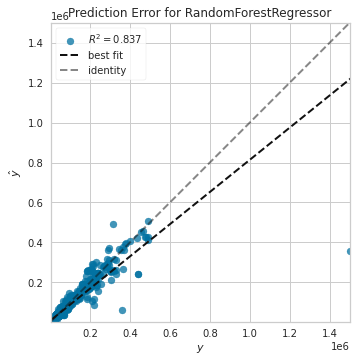

In [40]:
plot_model(rf,plot = 'error')

## 3.4 K - Neighbors Regressor 

In [41]:
knn = create_model('knn', return_train_score=True)

In [42]:
pred_holdout = predict_model(knn)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,5101.8076,549816182.4531,23448.1595,0.8221,0.2692,0.1740


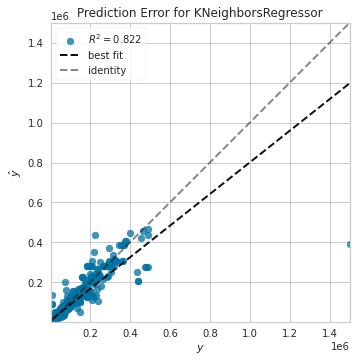

In [43]:
plot_model(knn,plot = 'error')

## 4. Kết luận

1. Chúng ta có thể thấy rằng sử dụng các mô hình học máy khác nhau sẽ dẫn đến các giá trị khác nhau của mean absolute error và r2 score .
2. Có thể chọn mô hình Random Forest Regression làm mô hình cuối cùng vì có MAE thấp nhất trong các mô hình còn lại